> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 3.9 - Visualização de Dados

## Exercícios
Vamos trabalhar com as mesmas bases de dados do exercício de Pandas. Aqui estão os links caso você queira baixar novamente, mas recomendo trabalhar com o `wc_formatado.csv` que exportamos na questão Q2 do exercício anterior.

* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1930_2022.csv
* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1991_2023.csv

Para relembrar, essas são as colunas do dataframe:
```
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time_1             1312 non-null   string        
 1   time_2             1312 non-null   string        
 2   gols_1             1312 non-null   int64         
 3   gols_2             1312 non-null   int64         
 4   data               1312 non-null   datetime64[ns]
 5   ano                1312 non-null   int64         
 6   país_sede          1312 non-null   string        
 7   comparecimento     1312 non-null   int64         
 8   resultado          1312 non-null   string        
 9   rodada             1312 non-null   category      
 10  gols_1_detalhes    970 non-null    string        
 11  gols_2_detalhes    771 non-null    string        
 12  gols_1_contra      57 non-null     string        
 13  gols_2_contra      30 non-null     string        
 14  gols_1_penalti     170 non-null    string        
 15  gols_2_penalti     119 non-null    string        
 16  cartao_vermelho_1  59 non-null     string        
 17  cartao_vermelho_2  65 non-null     string        
 18  cartao_amarelo_1   834 non-null    string        
 19  cartao_amarelo_2   857 non-null    string        
 20  copa               1312 non-null   string 
```

#### Q1.
Realize todos os imports necessários para executar as três bibliotecas de visualização que conhecemos:
* Matplotlib (lembre-se do comando mágico)
* Seaborn
* Plotly

Para cada uma delas, altere o tema padrão de visualização. 

In [10]:
# Célula para carregar e preparar os dados
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',12)
try:
    wc = pd.read_csv('wc_formatado.csv')
except FileNotFoundError:
    wcwomen_df = pd.read_csv('https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1991_2023.csv')
    wcmen_df = pd.read_csv('https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1930_2022.csv')
    wc = pd.concat((wcwomen_df,wcmen_df)).reset_index(drop=True)
    nomes_traduzidos = {'home_team': 'time_1', 'away_team': 'time_2', 'home_score': 'gols_1', 'away_score': 'gols_2', 'Date': 'data', 'Year': 'ano', 'Host': 'país_sede', 'Attendance': 'comparecimento', 'Score': 'resultado', 'Round': 'rodada', 'home_goal': 'gols_1_detalhes', 'away_goal': 'gols_2_detalhes', 'home_own_goal': 'gols_1_contra', 'away_own_goal': 'gols_2_contra', 'home_penalty_goal': 'gols_1_penalti', 'away_penalty_goal': 'gols_2_penalti', 'home_red_card': 'cartao_vermelho_1', 'away_red_card': 'cartao_vermelho_2', 'home_yellow_card_long': 'cartao_amarelo_1', 'away_yellow_card_long': 'cartao_amarelo_2'}
    wc = wc.loc[:, nomes_traduzidos.keys()]
    wc.columns = nomes_traduzidos.values()
    copa = wc['ano'].apply( lambda x: 'Masculina' if x % 2 == 0 else 'Feminina').astype('string')
    wc['copa'] = copa
    wc['data'] = pd.to_datetime(wc['data'])
    
wc.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   time_1             1312 non-null   object
 1   time_2             1312 non-null   object
 2   gols_1             1312 non-null   int64 
 3   gols_2             1312 non-null   int64 
 4   data               1312 non-null   object
 5   ano                1312 non-null   int64 
 6   país_sede          1312 non-null   object
 7   comparecimento     1312 non-null   int64 
 8   resultado          1312 non-null   object
 9   rodada             1312 non-null   object
 10  gols_1_detalhes    970 non-null    object
 11  gols_2_detalhes    771 non-null    object
 12  gols_1_contra      57 non-null     object
 13  gols_2_contra      30 non-null     object
 14  gols_1_penalti     170 non-null    object
 15  gols_2_penalti     119 non-null    object
 16  cartao_vermelho_1  59 non-null     object


In [11]:
# Import das bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Comando mágico para o Matplotlib
%matplotlib inline

# Alteração dos temas de visualização
plt.style.use('ggplot')
sns.set_style('whitegrid')
plotly_template = 'plotly_dark'

print("Bibliotecas importadas e temas definidos.")

Bibliotecas importadas e temas definidos.


#### Q2.
Sobre os dados de copa do mundo, qual a distribuição de público presente nos jogos? Isso pode ser respondido com um histograma com os dados da coluna `comparecimento`.  

Lembre-se que alguns jogos estavam com público 0 incorretamente, que tal remover essas ocorrências para não atrapalhar sua visualzação?

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

In [12]:
# Filtra o DataFrame para remover jogos com comparecimento igual a zero
publico = wc[wc['comparecimento'] > 0]

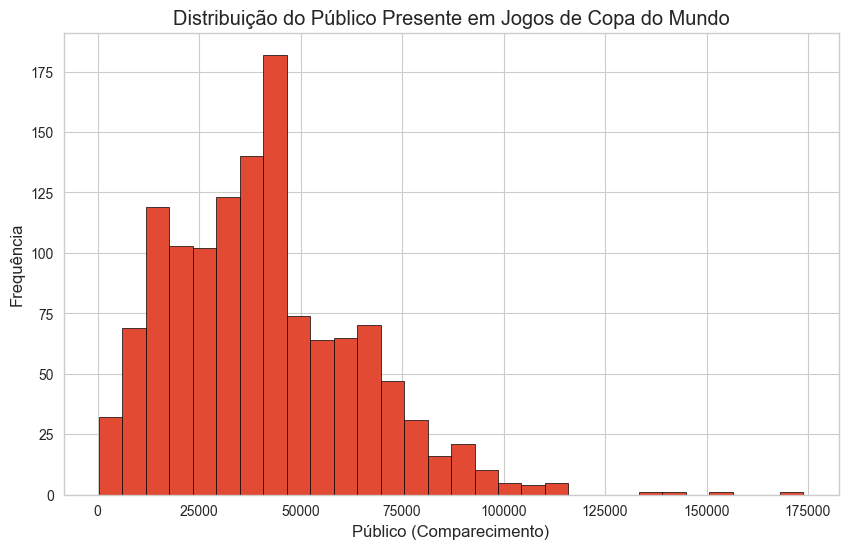

In [13]:
#### Solução com matplotlib
plt.figure(figsize=(10, 6))
plt.hist(publico['comparecimento'], bins=30, edgecolor='black')
plt.title('Distribuição do Público Presente em Jogos de Copa do Mundo')
plt.xlabel('Público (Comparecimento)')
plt.ylabel('Frequência')
plt.show()

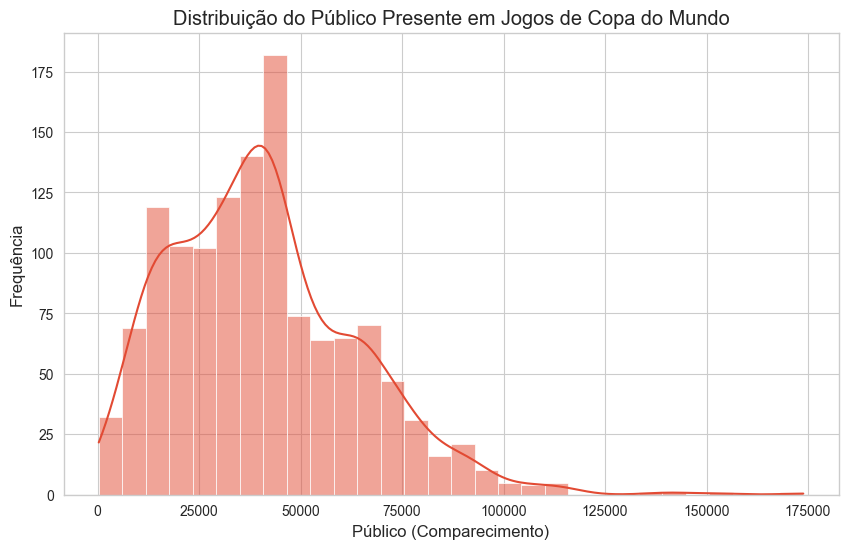

In [14]:
#### Solução com seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=publico, x='comparecimento', bins=30, kde=True)
plt.title('Distribuição do Público Presente em Jogos de Copa do Mundo')
plt.xlabel('Público (Comparecimento)')
plt.ylabel('Frequência')
plt.show()

In [15]:
#### Solução com plotly
fig = px.histogram(publico, x='comparecimento', nbins=30,
                   title='Distribuição do Público Presente em Jogos de Copa do Mundo')
fig.update_layout(xaxis_title='Público (Comparecimento)',
                  yaxis_title='Frequência')
fig.show()

#### Q3.

Apresente um gráfico de dispersão (scatter) dos atributos `gols_1` e `gols_2`. Isso representa a relação entre gols feitos e gols tomados por jogo. Há alguma relação interessante entre esses atributos?

Para facilitar a visualização dos dados (já que tem muitos placares repetidos), aplique uma leve distorção aos dados para que cada ponto esteja deslocado aleatoriamente de seu valor original. Código apresentado a seguir
```python
gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc),2))
```

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

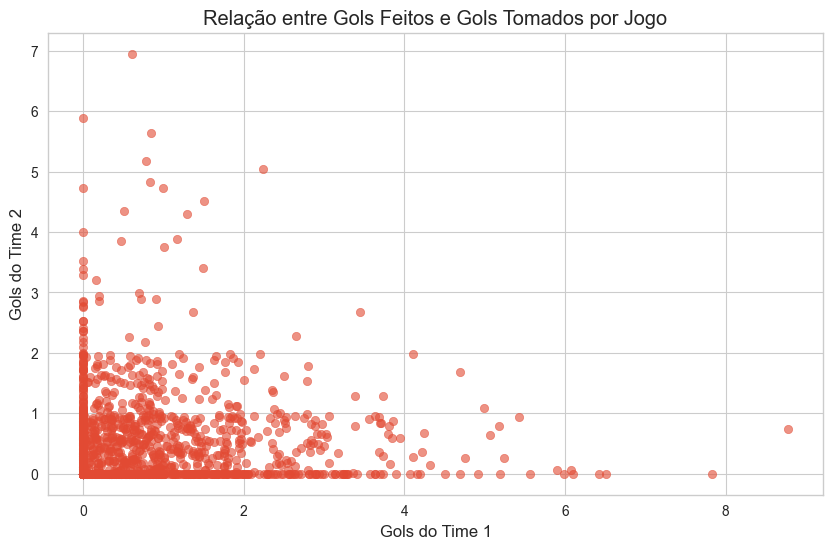

In [16]:
# Aplica a distorção aleatória nos dados de gols
gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc),2))

#### Solução com matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(gols['gols_1'], gols['gols_2'], alpha=0.6)
plt.title('Relação entre Gols Feitos e Gols Tomados por Jogo')
plt.xlabel('Gols do Time 1')
plt.ylabel('Gols do Time 2')
plt.show()

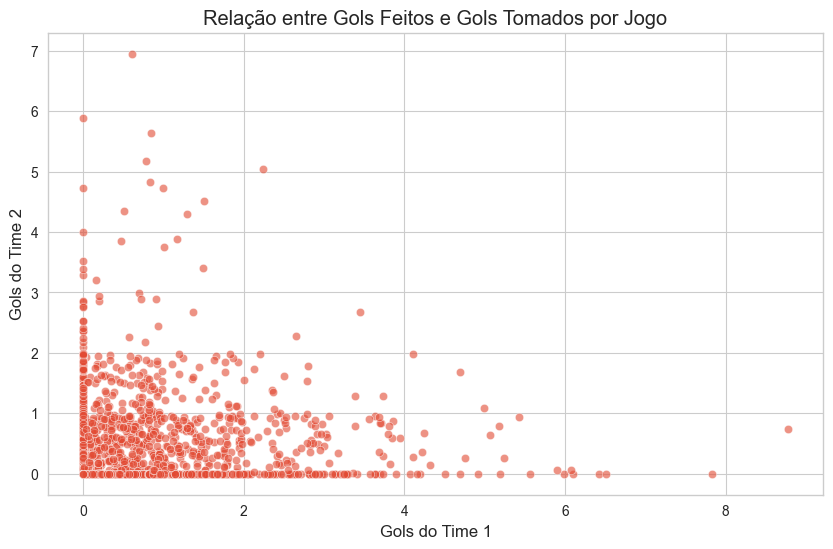

In [17]:
#### Solução com seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=gols['gols_1'], y=gols['gols_2'], alpha=0.6)
plt.title('Relação entre Gols Feitos e Gols Tomados por Jogo')
plt.xlabel('Gols do Time 1')
plt.ylabel('Gols do Time 2')
plt.show()

In [18]:
#### Solução com plotly
fig = px.scatter(gols, x='gols_1', y='gols_2',
                   title='Relação entre Gols Feitos e Gols Tomados por Jogo')
fig.update_layout(xaxis_title='Gols do Time 1',
                  yaxis_title='Gols do Time 2')
fig.show()


#### Q4.

Apresente um gráfico de barras com o top 10 países que mais participaram de copas do mundo, onde no eixo x devem estar o nome dos países e no eixo y a contagem de participações. Você deve separar a contagem de participações em copas femininas e masculinas, empilhando as barras de cada informação.

No exemplo de barras empilhadas da galeria do matplotlib, imagine que a parte azul são as participações do país em copas masculinas, e em laranja as participações femininas:
* https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos:
* título
* rótulos de dimensão.
* legenda

In [19]:
# Recria o DataFrame de participações
participacoes_times_1 = wc[['time_1', 'ano', 'copa']].rename(columns={'time_1': 'país'})
participacoes_times_2 = wc[['time_2', 'ano', 'copa']].rename(columns={'time_2': 'país'})
participacoes = pd.concat([participacoes_times_1, participacoes_times_2])
participacoes_unicas = participacoes.groupby(['país', 'copa'])['ano'].nunique().reset_index()
participacoes_unicas.rename(columns={'ano': 'num_copas'}, inplace=True)

# Calcula o total de participações para encontrar o top 10
total_participacoes = participacoes.groupby('país')['ano'].nunique().sort_values(ascending=False).head(10).index
participacoes_top10 = participacoes_unicas[participacoes_unicas['país'].isin(total_participacoes)]

# Pivota o dataframe para o formato necessário para gráficos de barras empilhadas
participacoes_pivot = participacoes_top10.pivot(index='país', columns='copa', values='num_copas').fillna(0)
participacoes_pivot = participacoes_pivot.reindex(total_participacoes) # Reordena para manter o top 10


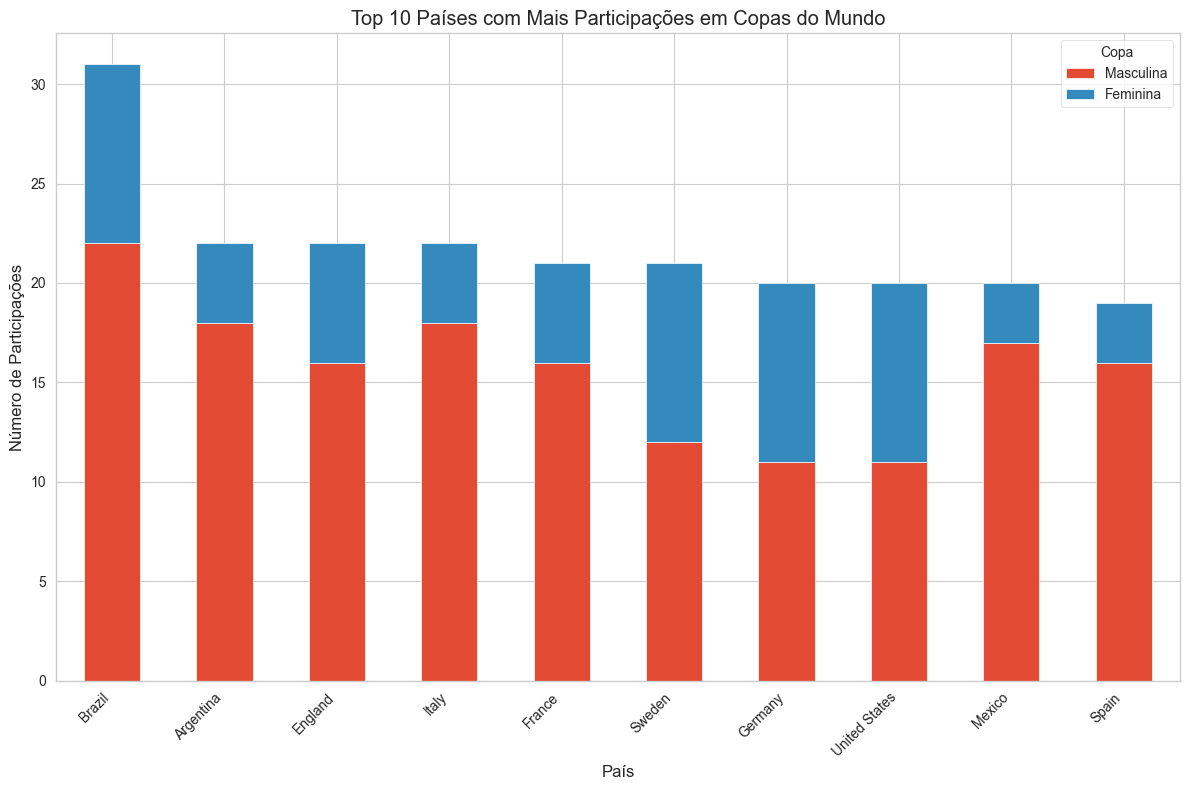

In [20]:
#### Solução com matplotlib
plt.figure(figsize=(12, 8))
participacoes_pivot[['Masculina', 'Feminina']].plot(kind='bar', stacked=True, figsize=(12, 8), ax=plt.gca())
plt.title('Top 10 Países com Mais Participações em Copas do Mundo')
plt.xlabel('País')
plt.ylabel('Número de Participações')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Copa')
plt.tight_layout()
plt.show()

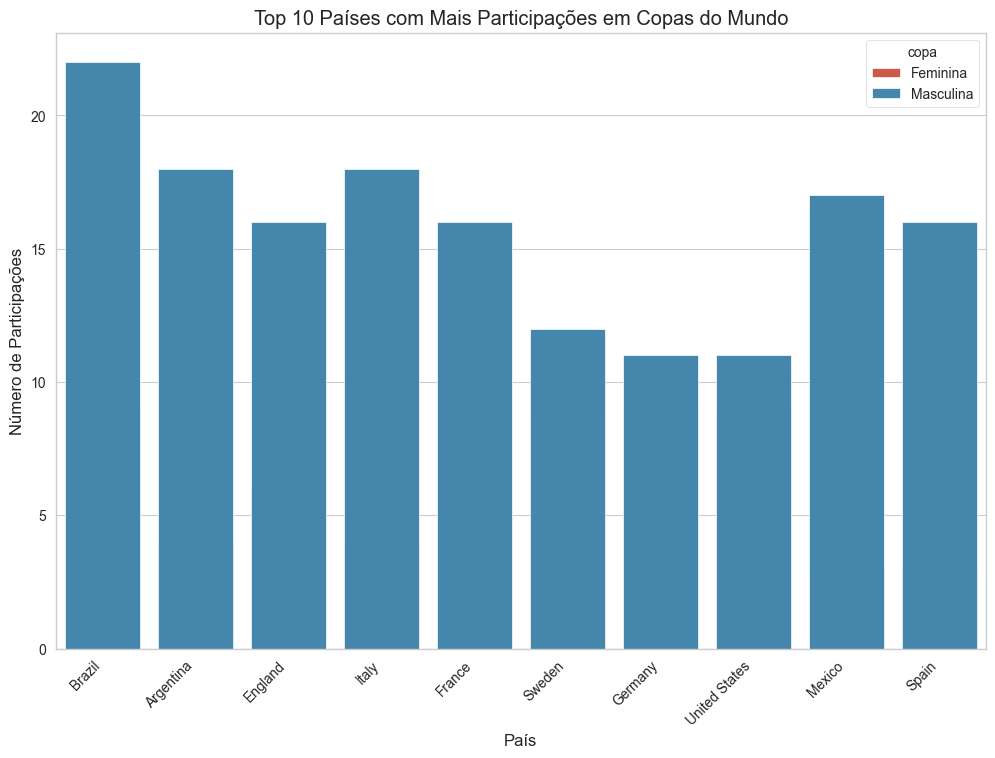

In [21]:
#### Solução com seaborn
plt.figure(figsize=(12, 8))
df_melted = participacoes_pivot.reset_index().melt('país', var_name='copa', value_name='num_copas')
sns.barplot(data=df_melted, x='país', y='num_copas', hue='copa', dodge=False)
plt.title('Top 10 Países com Mais Participações em Copas do Mundo')
plt.xlabel('País')
plt.ylabel('Número de Participações')
plt.xticks(rotation=45, ha='right')
plt.show()


In [22]:
#### Solução com plotly
fig = px.bar(participacoes_pivot.reset_index(),
             x='país',
             y=['Masculina', 'Feminina'],
             title='Top 10 Países com Mais Participações em Copas do Mundo',
             labels={'país': 'País', 'value': 'Número de Participações', 'variable': 'Copa'})
fig.update_layout(barmode='stack')
fig.show()



#### Q5.

Vamos fazer um compilado com as estatísticas históricas de copas do mundo!

Com a biblioteca de sua preferência você deve criar 4 subplots organizados em um grid de 2 linhas e 2 colunas. Eles devem conter os seguintes gráficos:
* Linha 1, coluna 1: Gráfico de barras com a quantidade de jogos que aconteceram por ano
* Linha 1, coluna 2: Gráfico de área (referências a seguir) com o total de gols por ano, separando as informações de `gols_1` e `gols_2` para distinguir gols em casa e do time visitante.
* Linha 2, coluna 1: Gráfico de área com o total de cartões por ano, separando as informações de cartões amarelos e cartões vermelhos, mas agregando cartões do time 1 ou time 2. Ou seja, uma área com `cartao_amarelo_1 + cartao_amarelo_2` e outra área com `cartao_vermelho_1 + cartao_vermelho_2`.
* Linha 2, coluna 2: Gráfico de barras com o total de gols contra por ano, somando `gols_contra_1` e `gols_contra_2`.

Referências sobre gráfico de área
* Matplotlib: https://matplotlib.org/stable/gallery/lines_bars_and_markers/stackplot_demo.html#sphx-glr-gallery-lines-bars-and-markers-stackplot-demo-py
* Pandas + Matplotlib: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.area.html
* Seaborn: https://seaborn.pydata.org/generated/seaborn.objects.Area.html
* Plotly: https://plotly.com/python/filled-area-plots/

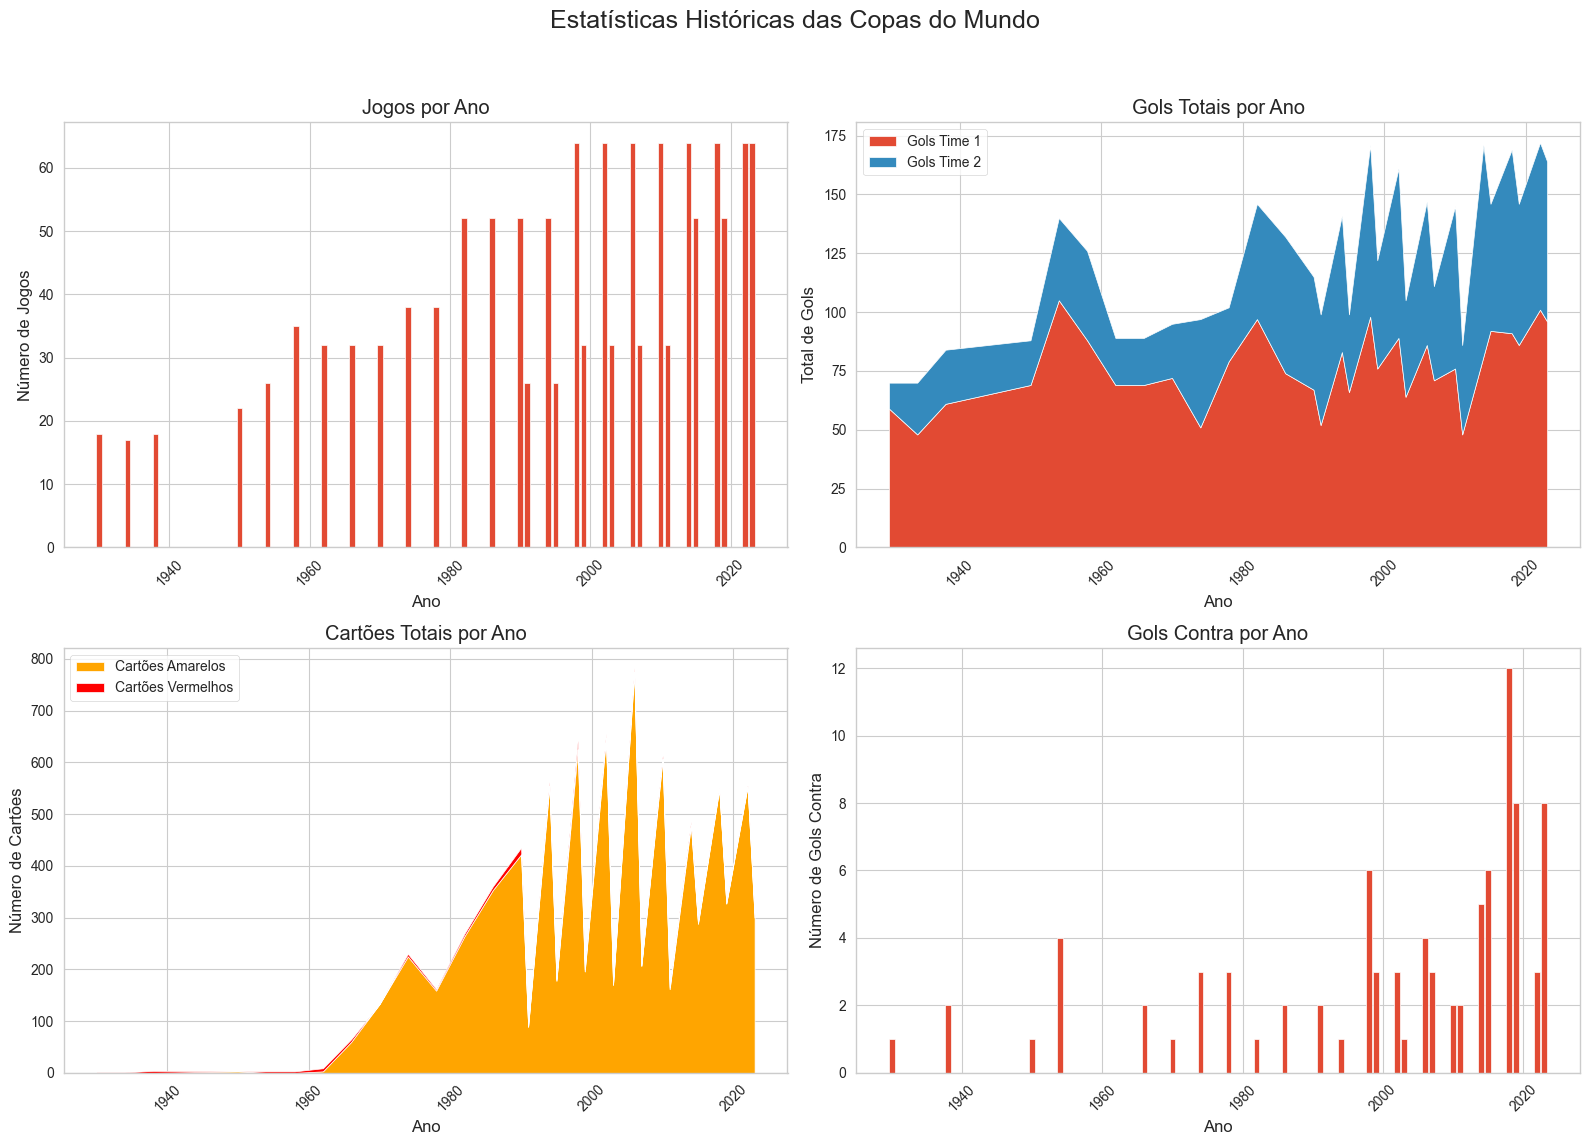

In [23]:
# Pré-processamento dos dados para os subplots

# Gráfico 1: jogos por ano
jogos_por_ano = wc.groupby('ano').size().reset_index(name='num_jogos')

# Gráfico 2: gols por ano (separados)
gols_por_ano = wc.groupby('ano')[['gols_1', 'gols_2']].sum().reset_index()

# Gráfico 3: cartões por ano (agregados)
wc['cartoes_amarelos'] = wc['cartao_amarelo_1'].str.split('|').str.len().fillna(0) + \
                         wc['cartao_amarelo_2'].str.split('|').str.len().fillna(0)
wc['cartoes_vermelhos'] = wc['cartao_vermelho_1'].str.split('|').str.len().fillna(0) + \
                          wc['cartao_vermelho_2'].str.split('|').str.len().fillna(0)
cartoes_por_ano = wc.groupby('ano')[['cartoes_amarelos', 'cartoes_vermelhos']].sum().reset_index()

# Gráfico 4: gols contra por ano
wc['gols_contra_1'] = wc['gols_1_contra'].str.split('|').str.len().fillna(0)
wc['gols_contra_2'] = wc['gols_2_contra'].str.split('|').str.len().fillna(0)
gols_contra_por_ano = wc.groupby('ano')[['gols_contra_1', 'gols_contra_2']].sum().sum(axis=1).reset_index(name='total_gols_contra')

# Cria o grid de subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Estatísticas Históricas das Copas do Mundo', fontsize=18)

# Linha 1, Coluna 1: Jogos por Ano (Barras)
axs[0, 0].bar(jogos_por_ano['ano'], jogos_por_ano['num_jogos'])
axs[0, 0].set_title('Jogos por Ano')
axs[0, 0].set_xlabel('Ano')
axs[0, 0].set_ylabel('Número de Jogos')
axs[0, 0].tick_params(axis='x', rotation=45)

# Linha 1, Coluna 2: Gols por Ano (Área)
axs[0, 1].stackplot(gols_por_ano['ano'],
                    [gols_por_ano['gols_1'], gols_por_ano['gols_2']],
                    labels=['Gols Time 1', 'Gols Time 2'])
axs[0, 1].set_title('Gols Totais por Ano')
axs[0, 1].set_xlabel('Ano')
axs[0, 1].set_ylabel('Total de Gols')
axs[0, 1].legend(loc='upper left')
axs[0, 1].tick_params(axis='x', rotation=45)

# Linha 2, Coluna 1: Cartões por Ano (Área)
axs[1, 0].stackplot(cartoes_por_ano['ano'],
                    [cartoes_por_ano['cartoes_amarelos'], cartoes_por_ano['cartoes_vermelhos']],
                    labels=['Cartões Amarelos', 'Cartões Vermelhos'], colors=['orange', 'red'])
axs[1, 0].set_title('Cartões Totais por Ano')
axs[1, 0].set_xlabel('Ano')
axs[1, 0].set_ylabel('Número de Cartões')
axs[1, 0].legend(loc='upper left')
axs[1, 0].tick_params(axis='x', rotation=45)

# Linha 2, Coluna 2: Gols Contra por Ano (Barras)
axs[1, 1].bar(gols_contra_por_ano['ano'], gols_contra_por_ano['total_gols_contra'])
axs[1, 1].set_title('Gols Contra por Ano')
axs[1, 1].set_xlabel('Ano')
axs[1, 1].set_ylabel('Número de Gols Contra')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

